Unique Defect Types: ['spot' 'pressed' 'flutter' 'stabbed']
Correlation Analysis for spot:
Total(T)        1.000000
coating(T)      0.973604
coating         0.869758
length          0.502905
width          -0.375252
Pass/Nonpass         NaN
Name: Total(T), dtype: float64
------------------------------------------------------------


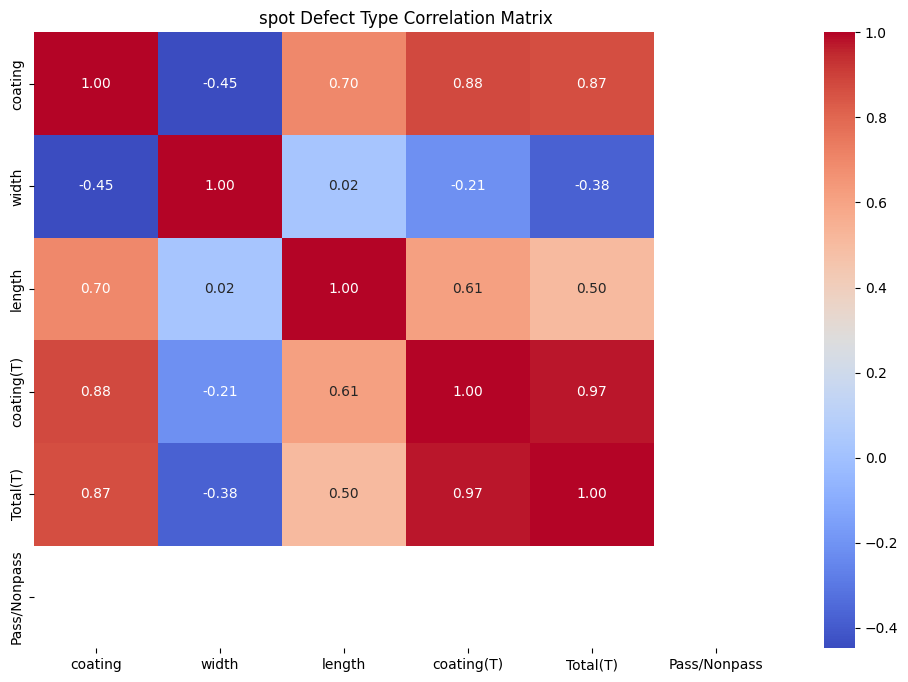

Correlation Analysis for pressed:
Total(T)        1.000000
coating(T)      0.975436
coating         0.863302
length          0.515985
width          -0.302784
Pass/Nonpass         NaN
Name: Total(T), dtype: float64
------------------------------------------------------------


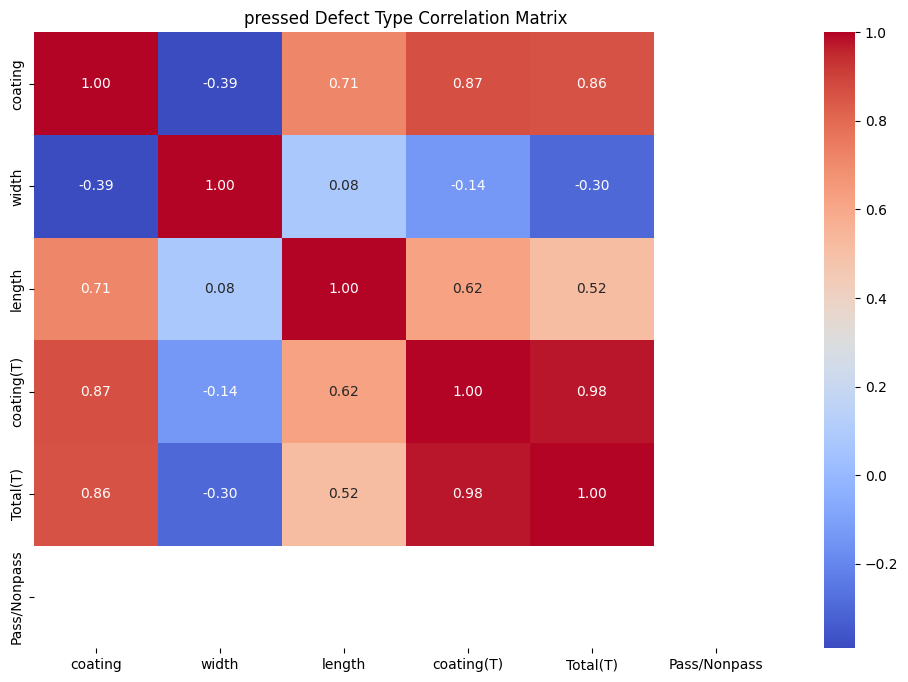

Correlation Analysis for flutter:
Total(T)        1.000000
coating(T)      0.975867
coating         0.854583
length          0.518043
width          -0.277366
Pass/Nonpass         NaN
Name: Total(T), dtype: float64
------------------------------------------------------------


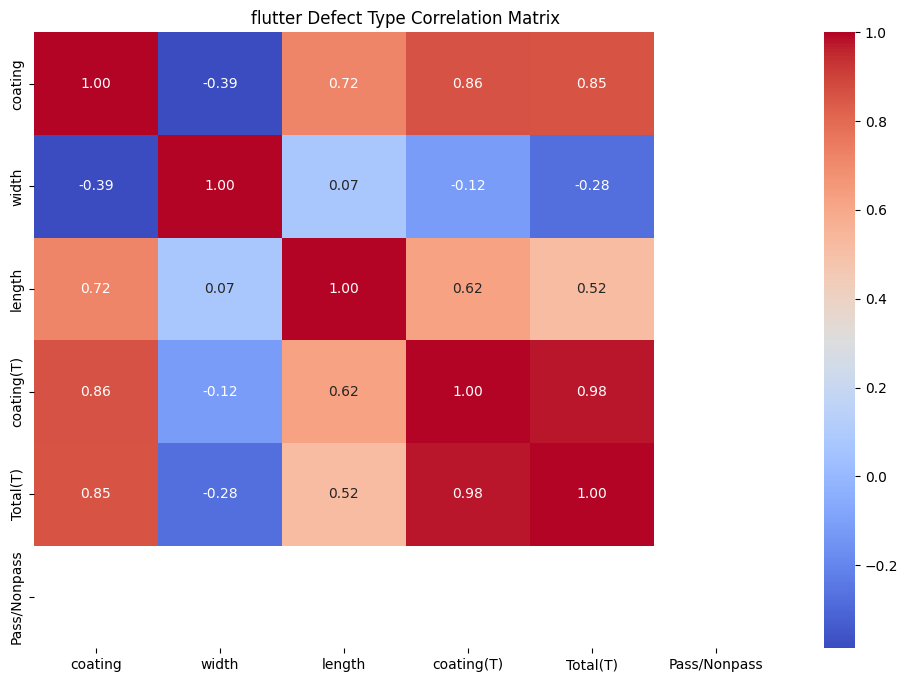

Correlation Analysis for stabbed:
Total(T)        1.000000
coating(T)      0.972015
coating         0.878314
length          0.508400
width          -0.385658
Pass/Nonpass         NaN
Name: Total(T), dtype: float64
------------------------------------------------------------


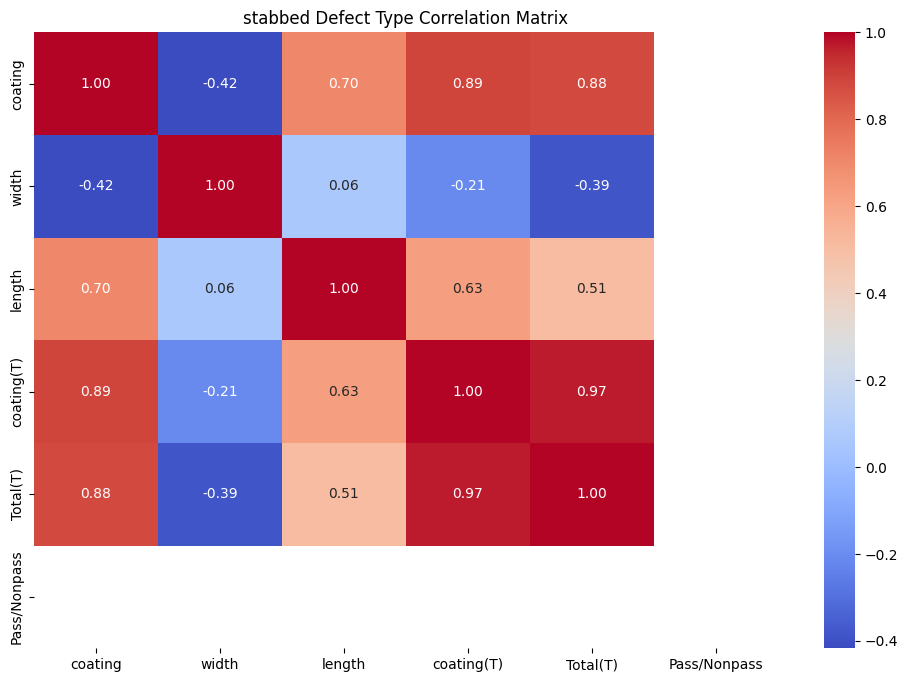

In [7]:

# Battery Separator Data Correlation Analysis

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset
data_df = pd.read_csv('3. Battery_Separator_Data.csv', encoding='utf-8-sig')

# Filter out rows where Pass/Nonpass is 1
filtered_df = data_df[data_df['Pass/Nonpass'] == 1].reset_index(drop=True)

# Check unique Defect types
unique_defects = filtered_df['Defect type'].unique()
print(f"Unique Defect Types: {unique_defects}")

# Define a function to analyze and visualize correlation
def analyze_and_visualize(defect_type, features, target='Total(T)'):
    defect_df = filtered_df[filtered_df['Defect type'] == defect_type]

    # Exclude non-numeric columns from correlation calculation
    numeric_features = defect_df.select_dtypes(include=['number']).columns

    # Include 'Total(T)' in numeric features if not already present
    if target not in numeric_features:
        numeric_features = numeric_features.append(pd.Index([target]))

    correlation_matrix = defect_df[numeric_features].corr()[target].sort_values(ascending=False)

    print(f'Correlation Analysis for {defect_type}:')
    print(correlation_matrix.head(10))
    print('-' * 60)

    plt.figure(figsize=(12, 8))
    # Use only numeric features for heatmap
    sb.heatmap(defect_df[numeric_features].corr(), cmap='coolwarm', annot=True, fmt=".2f")
    plt.title(f'{defect_type} Defect Type Correlation Matrix')
    plt.show()

# Analyze Defect type correlations with position, Grade, and coating
feature_columns = ['position', 'Grade', 'coating']

# Perform analysis for each Defect type
for defect in unique_defects:
    analyze_and_visualize(defect, feature_columns)


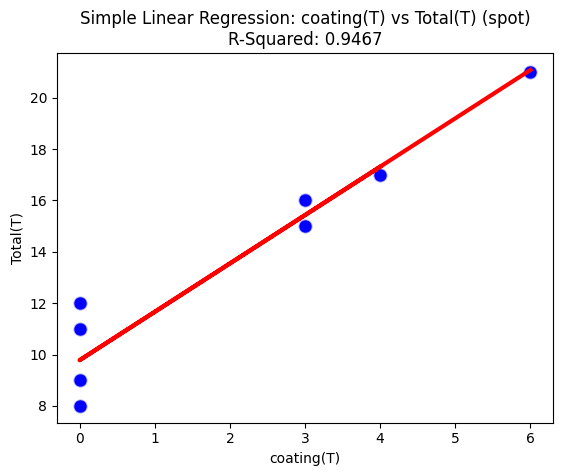

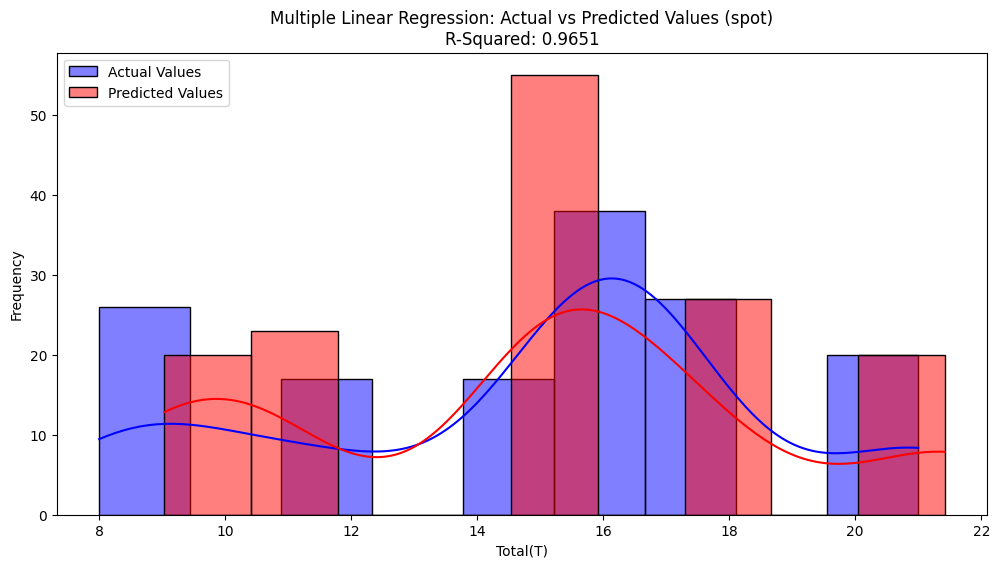

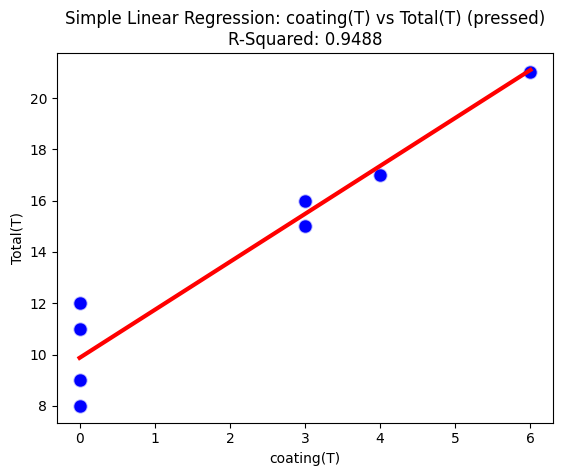

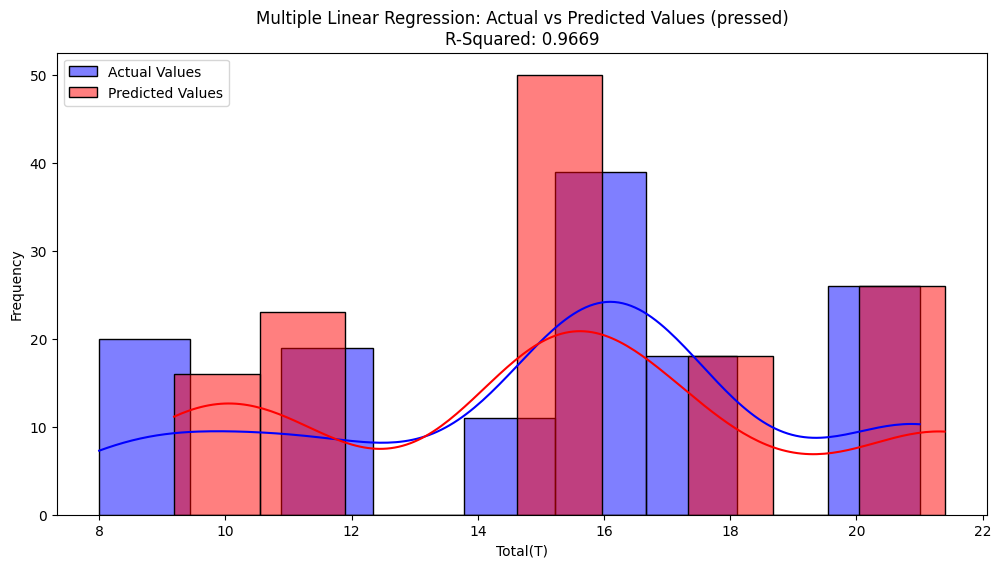

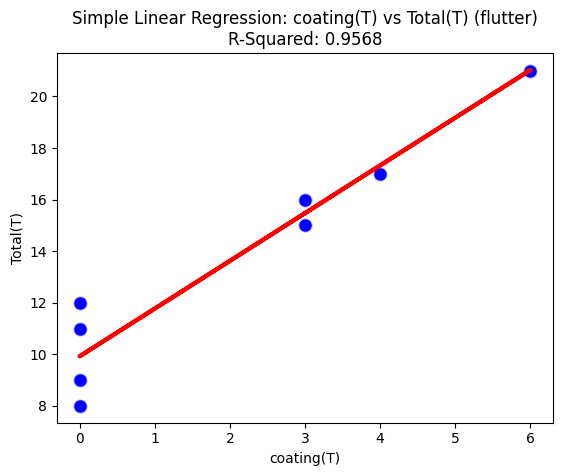

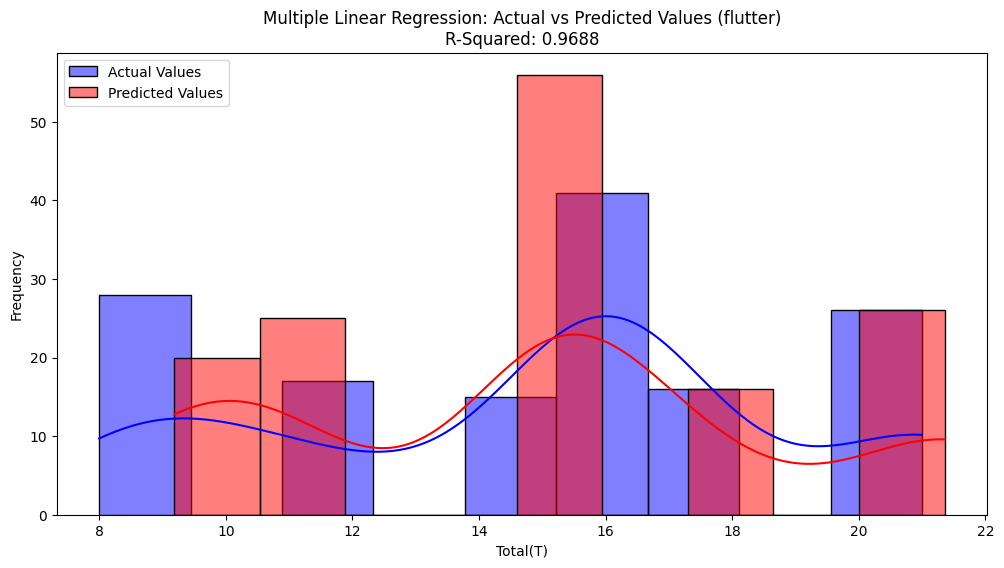

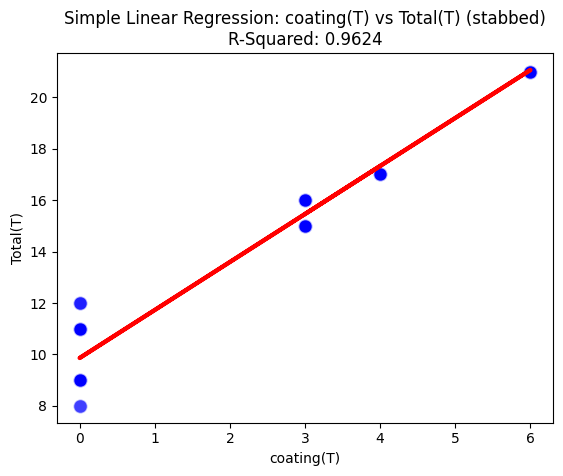

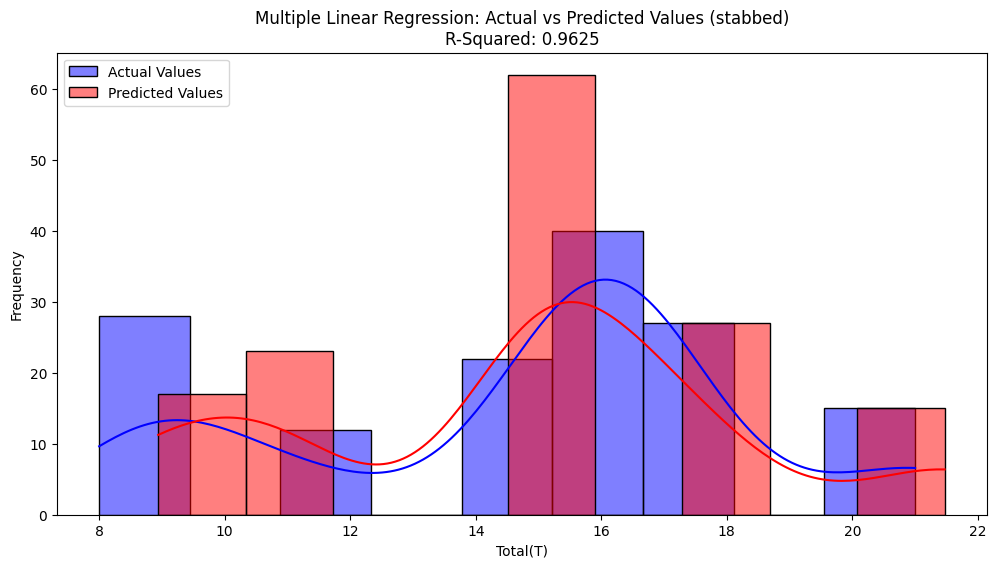

In [8]:

# -*- coding: utf-8 -*-
"""Regression Analysis: Simple & Multiple Linear Regression for All Defect Types"""

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data_df = pd.read_csv('3. Battery_Separator_Data.csv', encoding='utf-8-sig')

# Filter out rows where Pass/Nonpass is 1
filtered_df = data_df[data_df['Pass/Nonpass'] == 1].reset_index(drop=True)

# Define a function to perform regression analysis
def perform_regression_analysis(defect_type, feature, target='Total(T)'):
    defect_df = filtered_df[filtered_df['Defect type'] == defect_type]

    # Simple Linear Regression
    X_simple = defect_df[[feature]]
    y_simple = defect_df[target]

    X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
        X_simple, y_simple, test_size=0.2, random_state=42)
    lr_simple = LinearRegression()
    lr_simple.fit(X_train_simple, y_train_simple)
    simple_r_squared = lr_simple.score(X_test_simple, y_test_simple)

    plt.scatter(X_test_simple, y_test_simple, color='blue', s=100, alpha=0.5, edgecolor='white')
    plt.plot(X_test_simple, lr_simple.predict(X_test_simple), color='red', linewidth=3)
    plt.title(f'Simple Linear Regression: {feature} vs {target} ({defect_type})\nR-Squared: {simple_r_squared:.4f}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

    # Multiple Linear Regression using top two correlated features
    top_features = ['coating(T)', 'length']
    X_multiple = defect_df[top_features]
    y_multiple = defect_df[target]

    X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
        X_multiple, y_multiple, test_size=0.2, random_state=42)
    lr_multi = LinearRegression()
    lr_multi.fit(X_train_multi, y_train_multi)
    multi_r_squared = lr_multi.score(X_test_multi, y_test_multi)

    y_pred_multi = lr_multi.predict(X_test_multi)

    plt.figure(figsize=(12, 6))
    sb.histplot(y_test_multi, color='blue', label='Actual Values', kde=True)
    sb.histplot(y_pred_multi, color='red', label='Predicted Values', kde=True)
    plt.title(f'Multiple Linear Regression: Actual vs Predicted Values ({defect_type})\nR-Squared: {multi_r_squared:.4f}')
    plt.xlabel(target)
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    plt.show()

# Perform regression analysis for each Defect type
for defect in filtered_df['Defect type'].unique():
    perform_regression_analysis(defect, 'coating(T)')


<ipython-input-9-084320f9ada9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=total_defects_by_position.index, y=total_defects_by_position.values, palette='coolwarm')


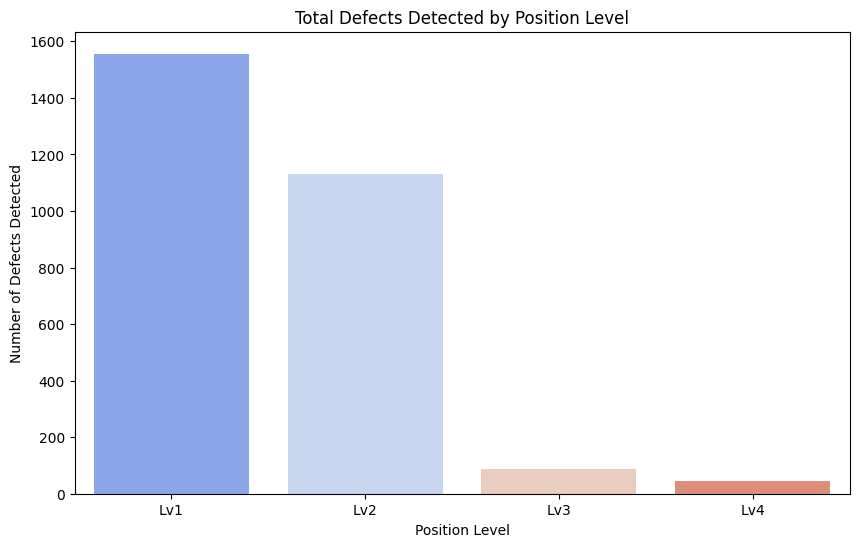

In [9]:

# -*- coding: utf-8 -*-
"""Position vs Defect Type Analysis"""

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset
data_df = pd.read_csv('3. Battery_Separator_Data.csv', encoding='utf-8-sig')

# Filter out rows where Pass/Nonpass is 1
filtered_df = data_df[data_df['Pass/Nonpass'] == 1].reset_index(drop=True)

# Group the filtered data by position and Defect type
position_defect_counts = filtered_df.groupby(['position', 'Defect type']).size().unstack(fill_value=0)

# Calculate the total number of defects detected by each position
total_defects_by_position = position_defect_counts.sum(axis=1).sort_values(ascending=False)

# Visualize the results
plt.figure(figsize=(10, 6))
sb.barplot(x=total_defects_by_position.index, y=total_defects_by_position.values, palette='coolwarm')
plt.title('Total Defects Detected by Position Level')
plt.xlabel('Position Level')
plt.ylabel('Number of Defects Detected')
plt.show()
